✅ Dataset saved as logistic_dataset.csv with 5000 rows
Accuracy: 0.819

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       430
           1       0.83      0.85      0.84       570

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000



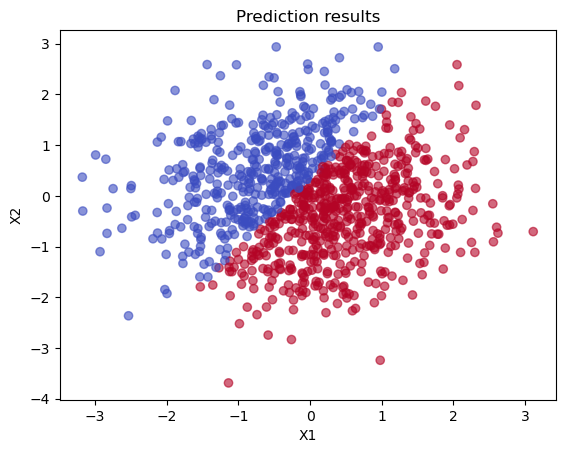


New Predictions:
Sample 1 (X1=0.5, X2=-1.2): Pred=1, Prob=0.9640
Sample 2 (X1=2.0, X2=1.0): Pred=1, Prob=0.9570


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Logistic Regression with Synthetic Dataset (5000 records)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Generate dataset (5000 records, 2 features, binary label)
np.random.seed(42)
n = 5000

X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)

# logistic relationship
w1, w2, bias = 2.0, -1.5, 0.5
logits = w1*X1 + w2*X2 + bias
probs = 1 / (1 + np.exp(-logits))

Y = np.random.binomial(1, probs)

df = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})
df.to_csv("logistic_dataset.csv", index=False)
print("✅ Dataset saved as logistic_dataset.csv with", len(df), "rows")

# 2. Split dataset
X = df[["X1","X2"]]
y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale + train logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 4. Evaluate
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Visualization (optional)
plt.scatter(X_test["X1"], X_test["X2"], c=y_pred, cmap="coolwarm", alpha=0.6)
plt.title("Prediction results")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 6. Predict on new data
new_data = np.array([[0.5, -1.2], [2.0, 1.0]])  # two new samples
new_data_scaled = scaler.transform(new_data)
preds = model.predict(new_data_scaled)
probs = model.predict_proba(new_data_scaled)

print("\nNew Predictions:")
for i, (x, pred, prob) in enumerate(zip(new_data, preds, probs)):
    print(f"Sample {i+1} (X1={x[0]}, X2={x[1]}): Pred={pred}, Prob={prob[1]:.4f}")
